### %matplotlib inline



# Singular Value Decomposition (SVD) in Image Processing

In this notebook, we will demonstrate how **SVD** can be used for:
- **Image Compression**
- **Understanding matrix decomposition**

---

## Steps:
1. Load an image and represent it as a matrix
2. Apply SVD: **A = U Σ Vᵀ**
3. Visualize U, Σ, and Vᵀ
4. Reconstruct the image using top **k singular values**
5. Compare original vs compressed images



In [3]:
# Enable inline plots
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


## Step 1: Load the Image and Display It
We first load the image and convert it to **grayscale** so that it can be represented as a 2D matrix.


Original Image Shape: (1200, 1920)


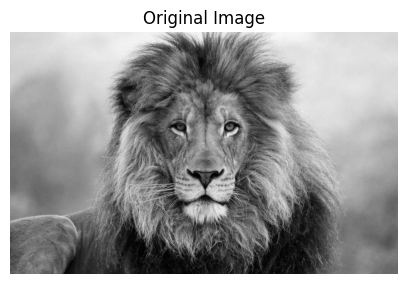

In [4]:
# Load image (change the file name if needed)
img = Image.open('image.jpg').convert('L')  # 'L' = grayscale
img_matrix = np.array(img)

print("Original Image Shape:", img_matrix.shape)

# Show original image
plt.figure(figsize=(5, 5))
plt.imshow(img_matrix, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()


## Step 2: Original Matrix
Here is a small **10×10 sample** from the original image matrix.


In [6]:
print("Original Image Matrix (1000x1000 sample):")
print(img_matrix[:1000, :1000])

Original Image Matrix (1000x1000 sample):
[[210 210 213 ... 240 238 240]
 [210 210 212 ... 239 235 234]
 [210 210 210 ... 238 232 227]
 ...
 [ 89  85  81 ...  98 101 129]
 [ 80  80  80 ...  82  72  81]
 [ 72  76  79 ...  93  73  62]]


## Step 3: Apply SVD
We decompose the image matrix using **Singular Value Decomposition**:

\[
A = U \Sigma V^T
\]

- **U**: Left singular vectors
- **Σ**: Singular values (diagonal matrix)
- **Vᵀ**: Right singular vectors


In [7]:
# Perform SVD
U, S, Vt = np.linalg.svd(img_matrix, full_matrices=False)
Sigma = np.diag(S)

print("\nShapes:")
print("U shape:", U.shape)
print("Sigma shape:", Sigma.shape)
print("Vt shape:", Vt.shape)



Shapes:
U shape: (1200, 1200)
Sigma shape: (1200, 1200)
Vt shape: (1200, 1920)


### Matrix Samples
Let's check the first few values of **U**, **Σ**, and **Vᵀ**.

In [9]:
print("\nU Matrix (1000x1000 sample):")
print(U[:1000, :1000])

print("\nFirst 1000 Singular Values (Σ):")
print(S[:1000])

print("\nVᵀ Matrix (1000x1000 sample):")
print(Vt[:1000, :1000])



U Matrix (1000x1000 sample):
[[ 0.04427907  0.05060199  0.01418692 ...  0.0223505   0.02604258
   0.02455393]
 [ 0.04424126  0.05040018  0.01413312 ... -0.04134396 -0.03004082
  -0.03734949]
 [ 0.04419778  0.05008943  0.01430834 ...  0.03291013 -0.00674545
   0.02195228]
 ...
 [ 0.0178095   0.02225251 -0.05237964 ...  0.01268506 -0.02524954
  -0.03979554]
 [ 0.01773321  0.02185472 -0.05283748 ... -0.01071042  0.0191795
   0.02032099]
 [ 0.01769389  0.02174507 -0.05311937 ...  0.00433249 -0.00741758
  -0.00506632]]

First 1000 Singular Values (Σ):
[2.19092007e+05 3.19333672e+04 2.32104152e+04 1.82630630e+04
 1.34545102e+04 1.31095800e+04 1.09547667e+04 8.08174755e+03
 7.67464357e+03 7.16303536e+03 6.71895781e+03 6.40206931e+03
 5.56449902e+03 5.38212295e+03 5.07618906e+03 4.90411180e+03
 4.66630311e+03 4.31515706e+03 4.05658561e+03 3.92345318e+03
 3.77765313e+03 3.70000811e+03 3.57122814e+03 3.34368510e+03
 3.28274486e+03 3.24657149e+03 3.08771841e+03 2.97983440e+03
 2.93728927e+03 2.8

## Step 4: Visualize U, Σ, and Vᵀ
We can visualize them as **heatmaps**.

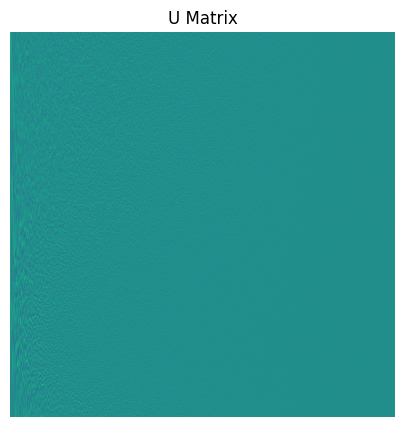

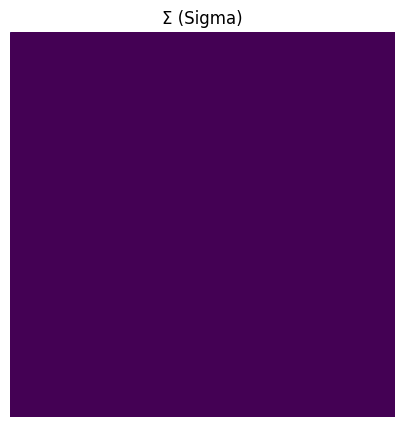

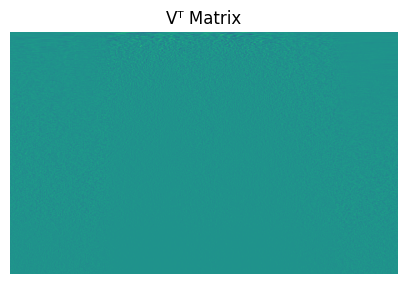

In [10]:
plt.figure(figsize=(5, 5))
plt.imshow(U, cmap='viridis')
plt.title('U Matrix')
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(Sigma, cmap='viridis')
plt.title('Σ (Sigma)')
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(Vt, cmap='viridis')
plt.title('Vᵀ Matrix')
plt.axis('off')
plt.show()


## Step 5: Reconstruct the Image with Top k Singular Values
By keeping only the **largest k singular values**, we can approximate the image.
- Larger k = better quality but more storage
- Smaller k = more compression but lower quality

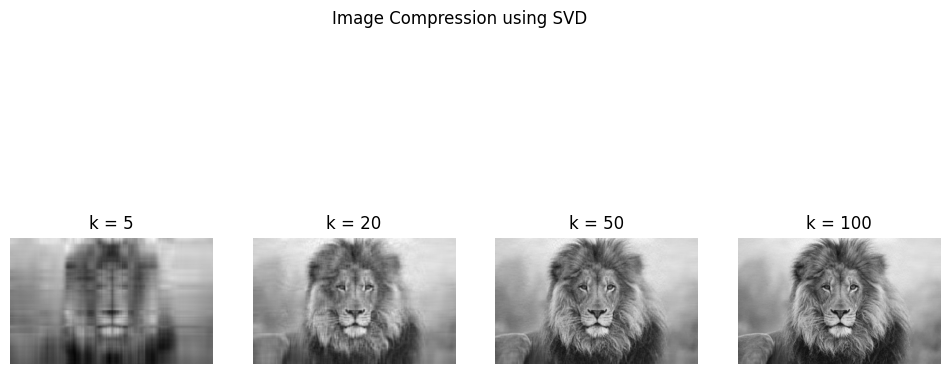

In [11]:
def reconstruct_image(k):
    Uk = U[:, :k]
    Sk = Sigma[:k, :k]
    Vk = Vt[:k, :]
    return np.dot(Uk, np.dot(Sk, Vk))

k_values = [5, 20, 50, 100]
plt.figure(figsize=(12, 6))

for i, k in enumerate(k_values, 1):
    compressed_img = reconstruct_image(k)
    plt.subplot(1, len(k_values), i)
    plt.imshow(compressed_img, cmap='gray')
    plt.title(f"k = {k}")
    plt.axis('off')

plt.suptitle("Image Compression using SVD")
plt.show()


## Conclusion
- **SVD** allows us to compress an image by reducing the number of singular values.
- This is the basis of many **image compression techniques**.
- Trade-off between **compression** and **image quality**.
